### AI Lab -  Assignment 5 - CH22M503

#### Author - Aloy Banerjee
###### Roll No. CH22M503

## Question:
##### Please use the dataset provided for this assignment. You have to work only with the file with your roll number specified on it. The feature columns are x0, x1, x2,. . . ,x26 and the class column is y.
##### Q1 Apply the k-means clustering algorithm to the data and evaluate its performance. Use the class column as the true class. 
##### Q2 Use hierarchical clustering on the data and report the effect of the parameters linkage and distance metric on the number of clusters obtained.
##### Q3 Cluster the given data using spectral clustering. Are the obtained clusters better than the ones obtined from K-means or hierarchical clustering? 
##### Q4 Visualize the clusters using the UMAP or tSNE algorithm. 

#### Importing Library

In [8]:
#Import library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import rand_score, silhouette_score, accuracy_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import umap.umap_ as umap
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

sns.set(context="notebook", palette="viridis", style="darkgrid", font_scale=1.0, color_codes=True,rc={'figure.figsize':(14,10)})

#### Common variable declaration

In [9]:
workingDir = 'E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 5\\Datasets'
dataset_fileName = '20.csv'
random_state = 42
cluster = 3

#### Common function

In [46]:
def get_num_clusters(input_data, linkage_method, distance_metric):
    '''# Define a function to calculate the number of clusters for each
    combination of linkage method and distance metric'''    
    Z = linkage(input_data, method=linkage_method, metric=distance_metric)
    dendrogram(Z)
    plt.title(f'Linkage method: {linkage_method}, Distance metric: {distance_metric}')
    plt.show()   
    return len(set(Z[:, 0]))

def evaluation_hierarchical_cluster(input_data, linkage_method, distance_metric, dataset,clusters=3):
    '''Evaluation of hierarchical clustering'''
    print(f'============Linkage method: {linkage_method}, Distance metric: {distance_metric}============')
    linkage_init = linkage(input_data, method=linkage_method, metric=distance_metric)
    y_pred_hierarchical = pd.Series(fcluster(linkage_init, t=clusters, criterion='maxclust'), index=dataset.index) 
    
    clust_agglo = AgglomerativeClustering(n_clusters=None, metric = distance_metric, linkage = linkage_method, distance_threshold = 0.1)
    y_pred_agglo_hierarchical = clust_agglo.fit_predict(input_data, dataset["y"])
    
    print('Hierarchical Clustering using fcluster:')
    print(f'Accuracy Score: {accuracy_score(dataset["y"], y_pred_hierarchical):.4f}')
    print(f'Silhouette score: {silhouette_score(input_data, y_pred_hierarchical):.4f}')
    print(f'Adjusted Rand score: {adjusted_rand_score(dataset["y"], y_pred_hierarchical):.4f}') 
    print(f'Rand score: {rand_score(dataset["y"], y_pred_hierarchical):.4f}') 
    
    print('Hierarchical Clustering using Agglomerative Clustering:')
    print(f'Accuracy Score: {accuracy_score(dataset["y"], y_pred_agglo_hierarchical):.4f}')
    print(f'Silhouette score: {silhouette_score(input_data, y_pred_agglo_hierarchical):.4f}')
    print(f'Adjusted Rand score: {adjusted_rand_score(dataset["y"], y_pred_agglo_hierarchical):.4f}') 
    print(f'Rand score: {rand_score(dataset["y"], y_pred_agglo_hierarchical):.4f}') 

def evaluation_spectral_cluster(input_data, dataset, clusters=3, neighbors=10, random_state=42, affinity='nearest_neighbors'):
    '''Evaluation of spectral clustering'''    
    spectral = SpectralClustering(n_clusters=clusters, affinity=affinity, n_neighbors=neighbors, random_state=random_state)
    y_pred_spectral = spectral.fit_predict(input_data)
    print('Spectral Clustering:')
    print(f'Accuracy Score: {accuracy_score(dataset["y"], y_pred_spectral):.4f}')
    print(f'Silhouette score: {silhouette_score(input_data, y_pred_spectral):.4f}')
    print(f'Adjusted Rand score: {adjusted_rand_score(dataset["y"], y_pred_spectral):.4f}')
    print(f'Rand score: {rand_score(dataset["y"], y_pred_spectral):.4f}')
    
def plotGraph(data,output_data, title, pallet_name):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(
        x=data[:, 0], y=data[:, 1],
        hue= output_data,
        palette=sns.color_palette(pallet_name, len(np.unique(output_data))),
        legend="full",
        alpha=0.3
    )
    plt.title(title)
    plt.show()

##### Loading Dataset

In [29]:
#Change the working directory 
os.chdir(workingDir)
#Load the data
dataset = pd.read_csv(dataset_fileName)

##### Display info of dataset

In [30]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     656 non-null    float64
 1   x_1     656 non-null    float64
 2   x_2     656 non-null    float64
 3   x_3     656 non-null    float64
 4   x_4     656 non-null    float64
 5   x_5     656 non-null    float64
 6   x_6     656 non-null    float64
 7   x_7     656 non-null    float64
 8   x_8     656 non-null    float64
 9   x_9     656 non-null    float64
 10  x_10    656 non-null    float64
 11  x_11    656 non-null    float64
 12  x_12    656 non-null    float64
 13  x_13    656 non-null    float64
 14  x_14    656 non-null    float64
 15  x_15    656 non-null    float64
 16  x_16    656 non-null    float64
 17  x_17    656 non-null    float64
 18  x_18    656 non-null    float64
 19  x_19    656 non-null    float64
 20  x_20    656 non-null    float64
 21  x_21    656 non-null    float64
 22  x_

None

##### Display statistical information of each column of dataset 

In [31]:
display(dataset.describe())

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,y
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,...,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,-40.435063,-0.984716,-12.790784,-10.933987,5.485038,-17.752110,15.492781,22.820251,-22.195422,-9.397266,...,-0.836180,-0.182102,13.903729,32.977997,-17.817377,-3.439460,-35.439220,-18.373910,-47.602020,1.009146
std,133.072149,9.329255,39.890301,208.336401,116.770821,132.577794,154.547622,55.065566,172.447913,176.457517,...,149.316611,9.931841,131.095404,625.610675,395.126504,87.644498,417.369288,146.337763,229.628289,0.812070
min,-453.313389,-32.519044,-130.330533,-565.130604,-438.909651,-465.885605,-389.928562,-169.359049,-466.613593,-594.876354,...,-496.262812,-35.806196,-451.704937,-1867.698325,-1261.104717,-252.982281,-1459.120679,-473.286277,-764.363201,0.000000
25%,-130.684897,-6.573260,-38.200277,-147.118734,-67.702065,-97.170759,-82.822191,-13.181524,-135.284174,-129.031296,...,-102.069316,-6.671025,-62.098753,-397.729271,-261.312124,-63.764299,-293.062802,-119.376387,-203.287195,0.000000
50%,-38.557959,-0.525092,-11.962022,-13.240939,7.475308,-11.220404,28.229553,21.366672,-19.044110,-5.718845,...,2.276465,-0.217970,17.628312,62.904519,-23.567163,-9.281922,-42.718033,-14.470315,-55.219801,1.000000
75%,47.794413,4.703112,13.772584,125.001757,76.864882,63.077471,109.971778,61.312017,89.529054,113.160519,...,102.871010,6.122821,97.437916,454.068838,253.990963,60.790026,214.890289,77.058733,103.293753,2.000000
max,403.683500,30.773498,122.096761,701.767723,399.582495,433.563036,594.683996,215.160008,473.253863,501.917565,...,431.833390,34.432561,545.568816,1743.432799,1351.192505,224.878045,1218.478903,378.985572,579.097868,2.000000


##### Display the given dataset 

In [32]:
display(dataset)

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,y
0,-191.803738,15.690691,-9.788765,407.470515,-154.834429,219.221662,65.309229,104.362411,319.350089,4.554673,...,10.969814,-2.804660,-84.399489,651.280499,444.976689,-57.143078,-862.614117,-113.900727,234.408009,1
1,81.852196,12.425420,-19.272976,-216.999392,87.543567,172.818985,-195.691517,-31.961407,202.170503,-103.752584,...,-80.678719,4.154208,184.291975,334.957750,446.646462,108.200491,-510.788325,3.537077,-87.302133,1
2,-178.591457,-18.281653,-6.899571,78.680639,-65.216085,-263.558411,51.268706,-34.361129,160.914944,-17.568454,...,-7.750558,-1.718275,-58.574718,-158.905173,85.011336,71.713745,-658.246153,-267.506817,-283.203614,0
3,220.621541,5.510600,-55.704083,326.473493,-220.411234,74.552654,35.424876,52.950090,108.533261,-27.525299,...,-16.175942,-18.941162,-44.161282,-224.575093,0.838122,-57.819985,-573.853676,-146.905740,92.044826,1
4,-149.246760,-4.319025,44.743975,257.133890,-204.847877,-65.135882,327.871372,167.874350,66.335438,246.997933,...,216.122910,-7.720805,4.310480,631.993954,131.821277,115.532488,31.135034,21.034357,-233.105555,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,-6.973438,-1.647022,-38.502352,98.265994,94.529249,-27.164121,-174.395897,-55.761056,-212.311104,23.011299,...,26.587629,-8.068829,-19.680578,-787.980961,-595.068360,25.878745,134.143437,-129.850702,-87.271307,2
652,-200.607057,2.426267,-36.886647,6.184606,175.859596,30.721284,-26.953789,18.746741,75.799700,-280.765513,...,-230.465314,22.883737,9.831354,106.239948,-38.175425,-146.515460,-749.765078,-71.263624,21.605678,0
653,129.272109,-8.996312,-35.888301,-100.570057,-55.064075,-131.604683,32.583537,45.173021,65.250255,77.119611,...,72.373549,15.300580,-330.760369,-499.591299,-256.099373,-96.566039,274.966573,2.127678,178.810101,0
654,130.968075,-6.806912,-58.252584,206.463239,96.539825,-100.491171,145.725904,87.123439,-268.032097,28.945179,...,31.608820,26.321717,-26.832946,-638.203857,-117.725242,-19.780262,930.692136,258.896384,-49.437084,1


##### Checking for null or na values in data set 

In [33]:
dataset.isnull().isna().values.any()

False

#### Check the unique target class

In [34]:
np.unique(dataset['y'])

array([0, 1, 2], dtype=int64)

#### 3 unique class is present in the dataset 

#### Q1 Apply the k-means clustering algorithm to the data and evaluate its performance. Use the class column as the true class.

In [35]:
input_data = dataset.drop('y', axis=1)
output_data = dataset['y']

In [36]:
input_data

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26
0,-191.803738,15.690691,-9.788765,407.470515,-154.834429,219.221662,65.309229,104.362411,319.350089,4.554673,...,62.732290,10.969814,-2.804660,-84.399489,651.280499,444.976689,-57.143078,-862.614117,-113.900727,234.408009
1,81.852196,12.425420,-19.272976,-216.999392,87.543567,172.818985,-195.691517,-31.961407,202.170503,-103.752584,...,49.671961,-80.678719,4.154208,184.291975,334.957750,446.646462,108.200491,-510.788325,3.537077,-87.302133
2,-178.591457,-18.281653,-6.899571,78.680639,-65.216085,-263.558411,51.268706,-34.361129,160.914944,-17.568454,...,13.250726,-7.750558,-1.718275,-58.574718,-158.905173,85.011336,71.713745,-658.246153,-267.506817,-283.203614
3,220.621541,5.510600,-55.704083,326.473493,-220.411234,74.552654,35.424876,52.950090,108.533261,-27.525299,...,-16.386701,-16.175942,-18.941162,-44.161282,-224.575093,0.838122,-57.819985,-573.853676,-146.905740,92.044826
4,-149.246760,-4.319025,44.743975,257.133890,-204.847877,-65.135882,327.871372,167.874350,66.335438,246.997933,...,-26.613167,216.122910,-7.720805,4.310480,631.993954,131.821277,115.532488,31.135034,21.034357,-233.105555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,-6.973438,-1.647022,-38.502352,98.265994,94.529249,-27.164121,-174.395897,-55.761056,-212.311104,23.011299,...,23.160057,26.587629,-8.068829,-19.680578,-787.980961,-595.068360,25.878745,134.143437,-129.850702,-87.271307
652,-200.607057,2.426267,-36.886647,6.184606,175.859596,30.721284,-26.953789,18.746741,75.799700,-280.765513,...,12.442765,-230.465314,22.883737,9.831354,106.239948,-38.175425,-146.515460,-749.765078,-71.263624,21.605678
653,129.272109,-8.996312,-35.888301,-100.570057,-55.064075,-131.604683,32.583537,45.173021,65.250255,77.119611,...,-43.602778,72.373549,15.300580,-330.760369,-499.591299,-256.099373,-96.566039,274.966573,2.127678,178.810101
654,130.968075,-6.806912,-58.252584,206.463239,96.539825,-100.491171,145.725904,87.123439,-268.032097,28.945179,...,3.037242,31.608820,26.321717,-26.832946,-638.203857,-117.725242,-19.780262,930.692136,258.896384,-49.437084


In [37]:
output_data

0      1
1      1
2      0
3      1
4      2
      ..
651    2
652    0
653    0
654    1
655    0
Name: y, Length: 656, dtype: int64

In [38]:
# Apply k-means clustering
kmeans_cluster = KMeans(n_clusters=cluster, random_state=random_state)
kmeans_cluster.fit(input_data)
# Get the predicted classes
y_pred = kmeans_cluster.predict(input_data)

#### Evaluation of the clustering

In [39]:
print(output_data.shape)
print(y_pred.shape)

(656,)
(656,)


In [40]:
# Evaluate the performance
print(f'Accuracy: {accuracy_score(output_data, y_pred):.4f}')
print(f'Rand Score: {rand_score(output_data, y_pred):.4f}')
print(f'Adjusted Rand Score: {adjusted_rand_score(output_data, y_pred):.4f}')
print(f'Silhouette Score: {silhouette_score(input_data, y_pred):.4f}')

Accuracy: 0.3750
Rand Score: 0.5573
Adjusted Rand Score: 0.0030
Silhouette Score: 0.1376


#### 1.  Note that the silhouette score ranges from -1 to 1, where a higher score indicates better clustering. The adjusted Rand score ranges from -1 to 1, where a score of 0 indicates that the clustering is random and a score of 1 indicates that the clustering is perfect. In our example we can see that the adjusted rand score is very small and close to approximately zero so we can say that clustering is random. Silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters, also looking at the Silhouette score also give similar indication. 
#### 2. On the top of it accuracy score is also very poor of only 37.5%

#### Q2 Use hierarchical clustering on the data and report the effect of the parameters linkage and distance metric on the number of clusters obtained.

In [41]:
# List of linkage methods and distance metrics  '
linkage_methods = ['average', 'complete', 'ward', 'single']
distance_metrics = ['manhattan', 'cosine', 'euclidean']

In [47]:
for linkage_method in linkage_methods:
    for distance_metric in distance_metrics:
        try:            
            evaluation_hierarchical_cluster(input_data, linkage_method, distance_metric, dataset,clusters=3)            
        except ValueError:
            print('Unable to calculate the evaluation for this combination')
        except Exception as e:
            print(e)

============Linkage method: average, Distance metric: manhattan============
Unable to calculate the evaluation for this combination
============Linkage method: average, Distance metric: cosine============
Hierarchical Clustering using fcluster:
Accuracy Score: 0.1784
Silhouette score: -0.0117
Adjusted Rand score: 0.0080
Rand score: 0.5045
Hierarchical Clustering using Agglomerative Clustering:
Accuracy Score: 0.0076
Silhouette score: 0.0089
Adjusted Rand score: 0.0006
Rand score: 0.6676
============Linkage method: average, Distance metric: euclidean============
Hierarchical Clustering using fcluster:
Accuracy Score: 0.3399
Silhouette score: 0.2629
Adjusted Rand score: 0.0003
Rand score: 0.3438
Hierarchical Clustering using Agglomerative Clustering:
Accuracy Score: 0.0030
Unable to calculate the evaluation for this combination
============Linkage method: complete, Distance metric: manhattan============
Unable to calculate the evaluation for this combination
============Linkage method: c

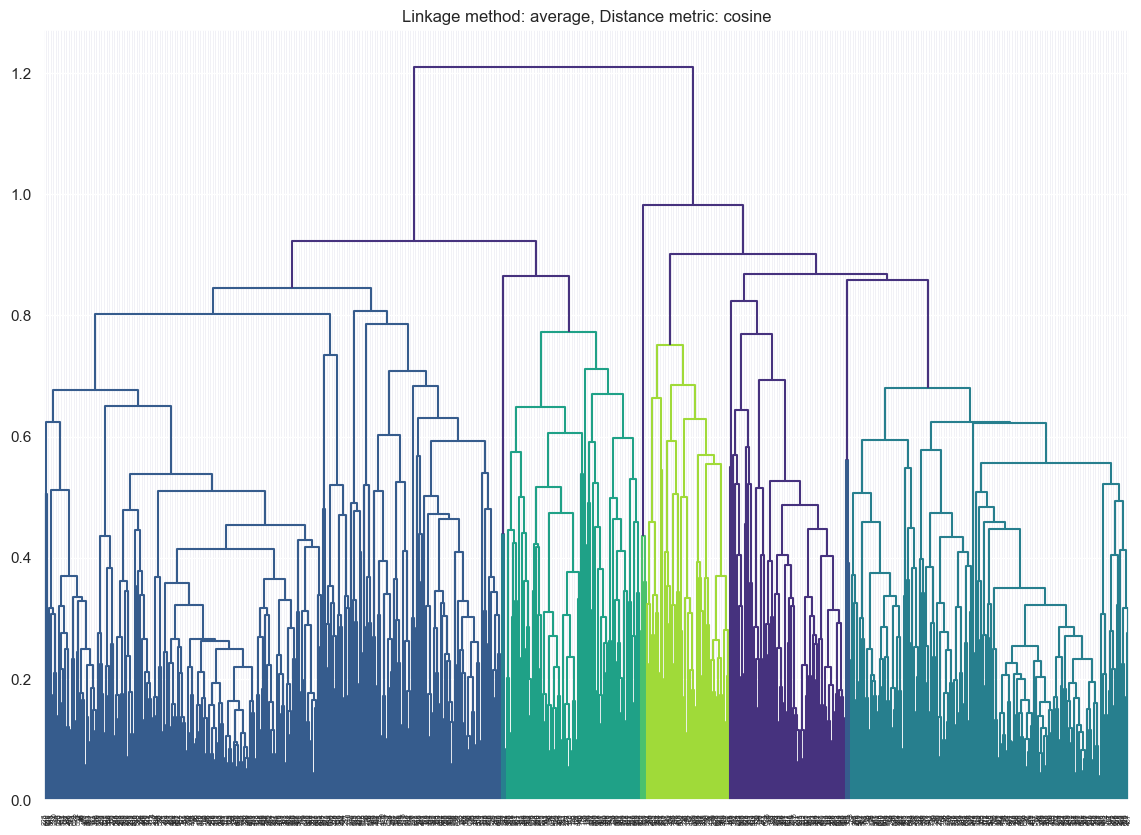

Linkage method: average, Distance metric: cosine, Number of clusters: 655


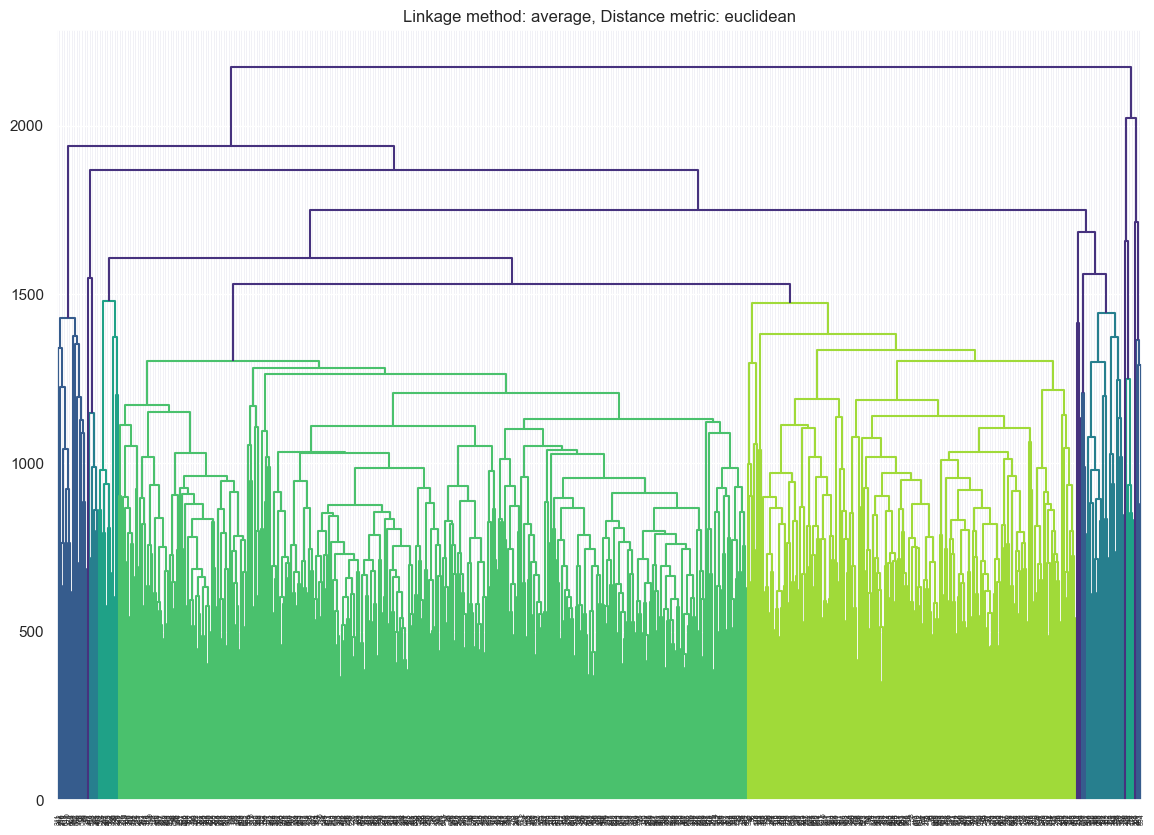

Linkage method: average, Distance metric: euclidean, Number of clusters: 655


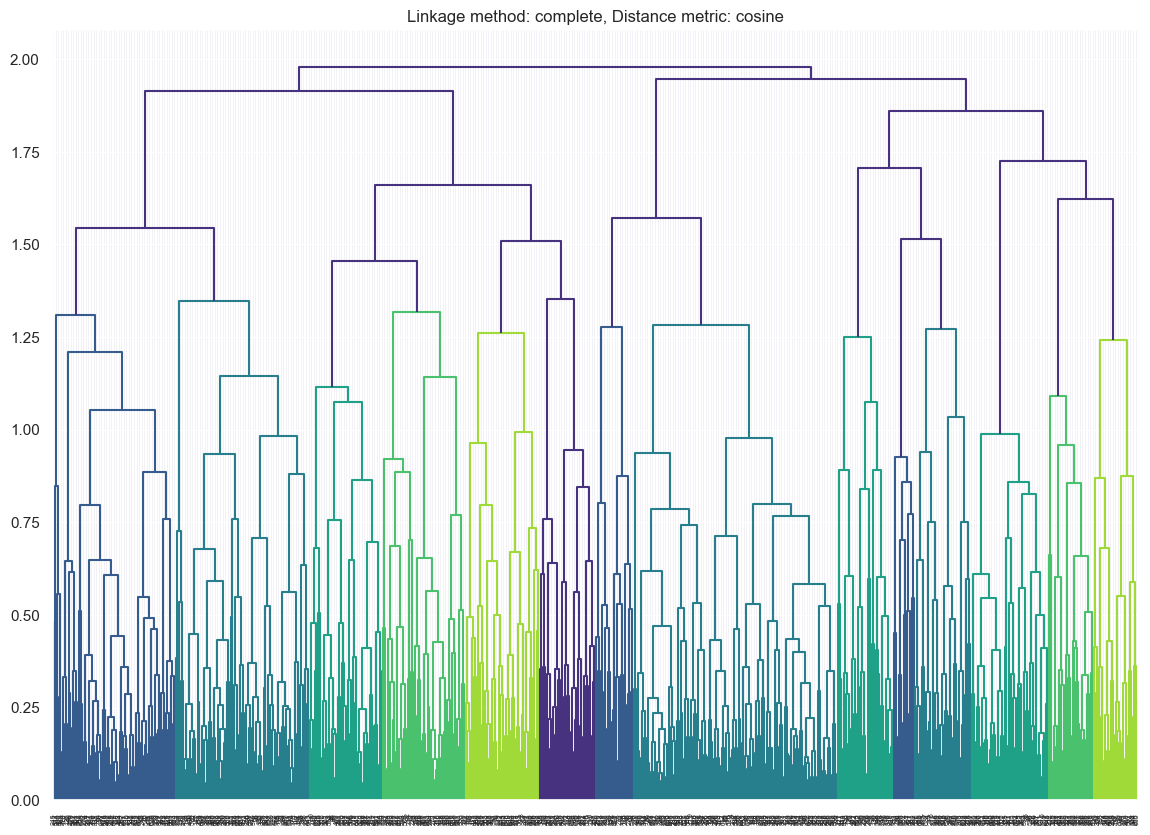

Linkage method: complete, Distance metric: cosine, Number of clusters: 655


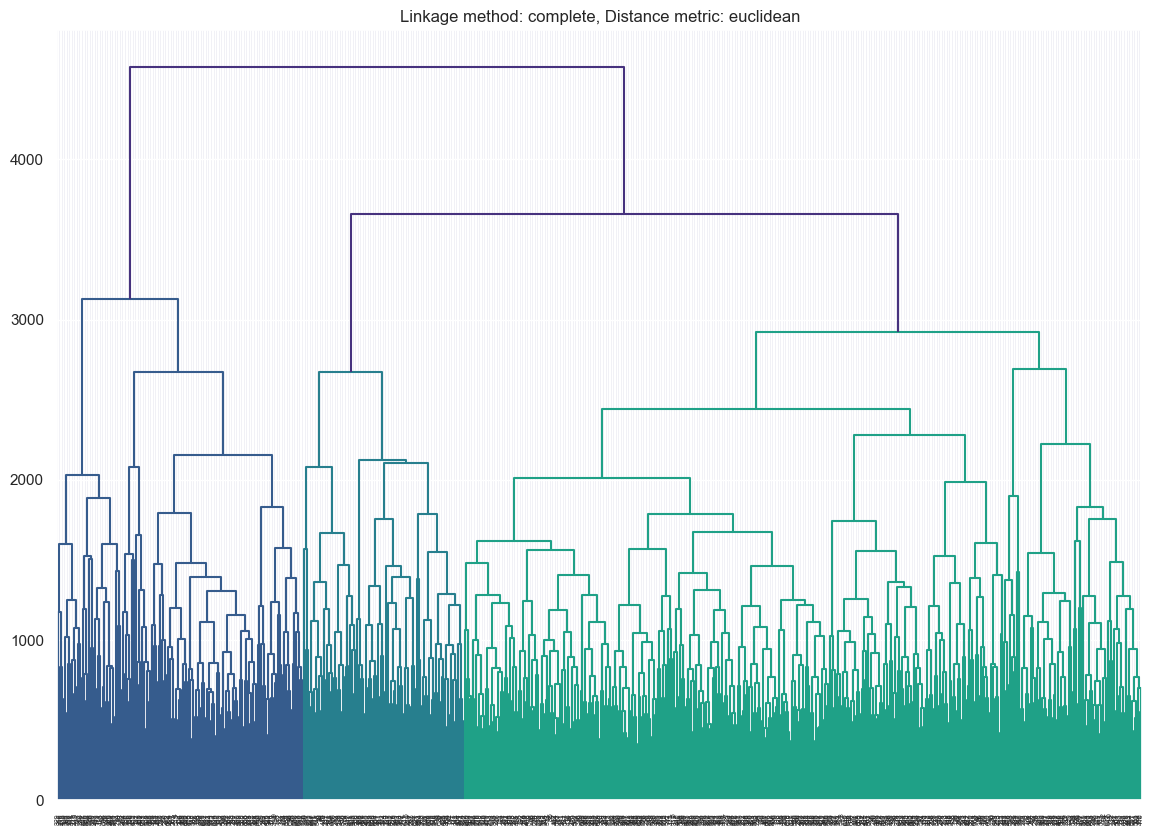

Linkage method: complete, Distance metric: euclidean, Number of clusters: 655


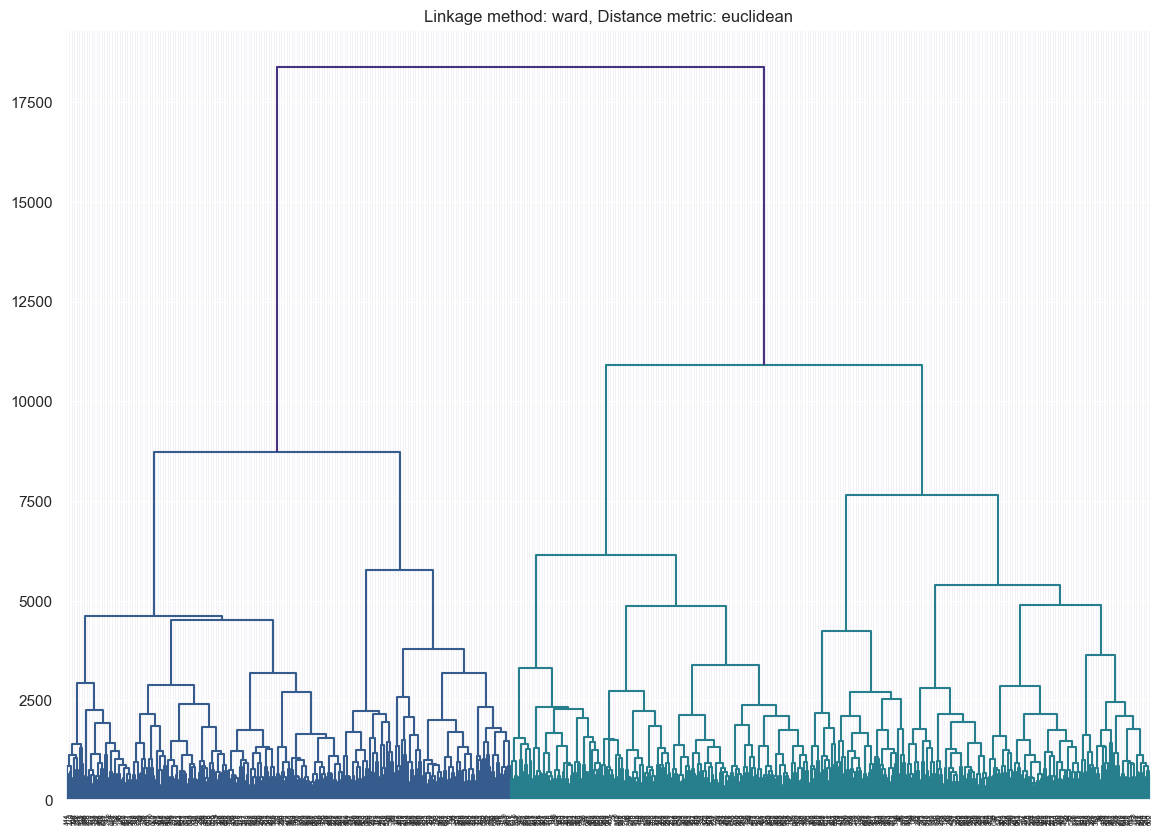

Linkage method: ward, Distance metric: euclidean, Number of clusters: 655


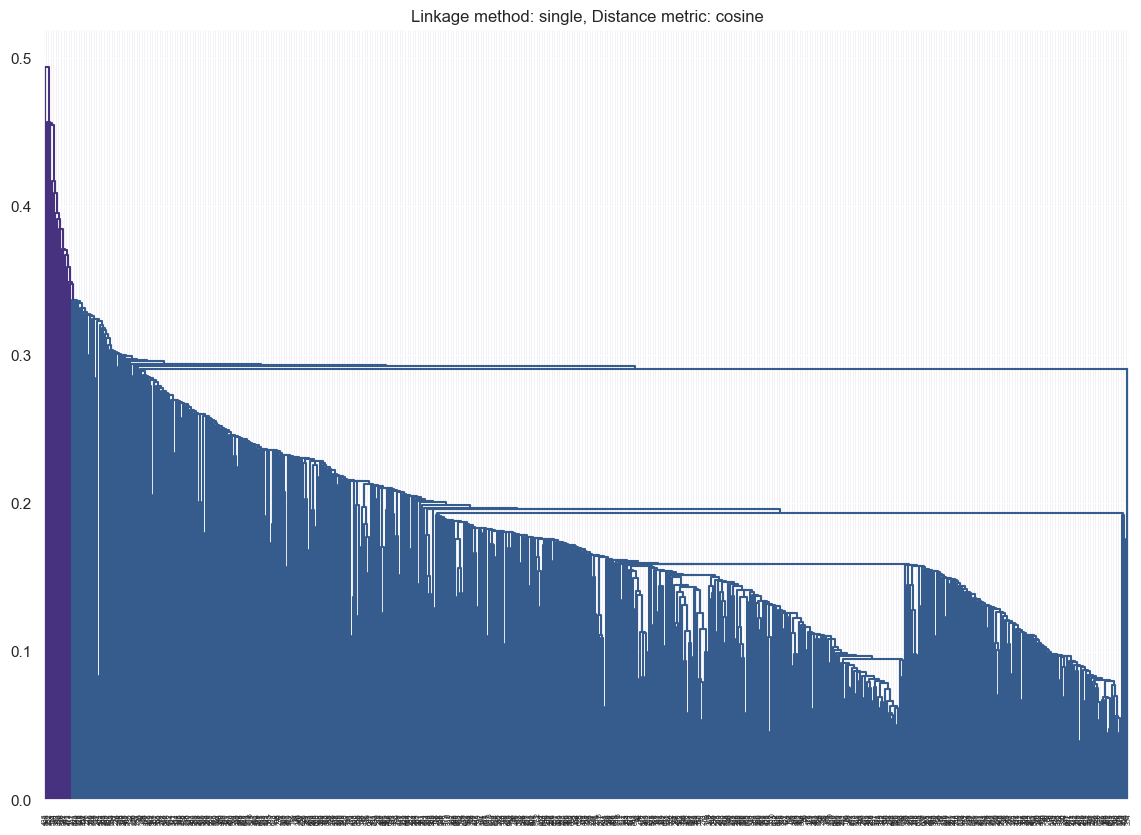

Linkage method: single, Distance metric: cosine, Number of clusters: 655


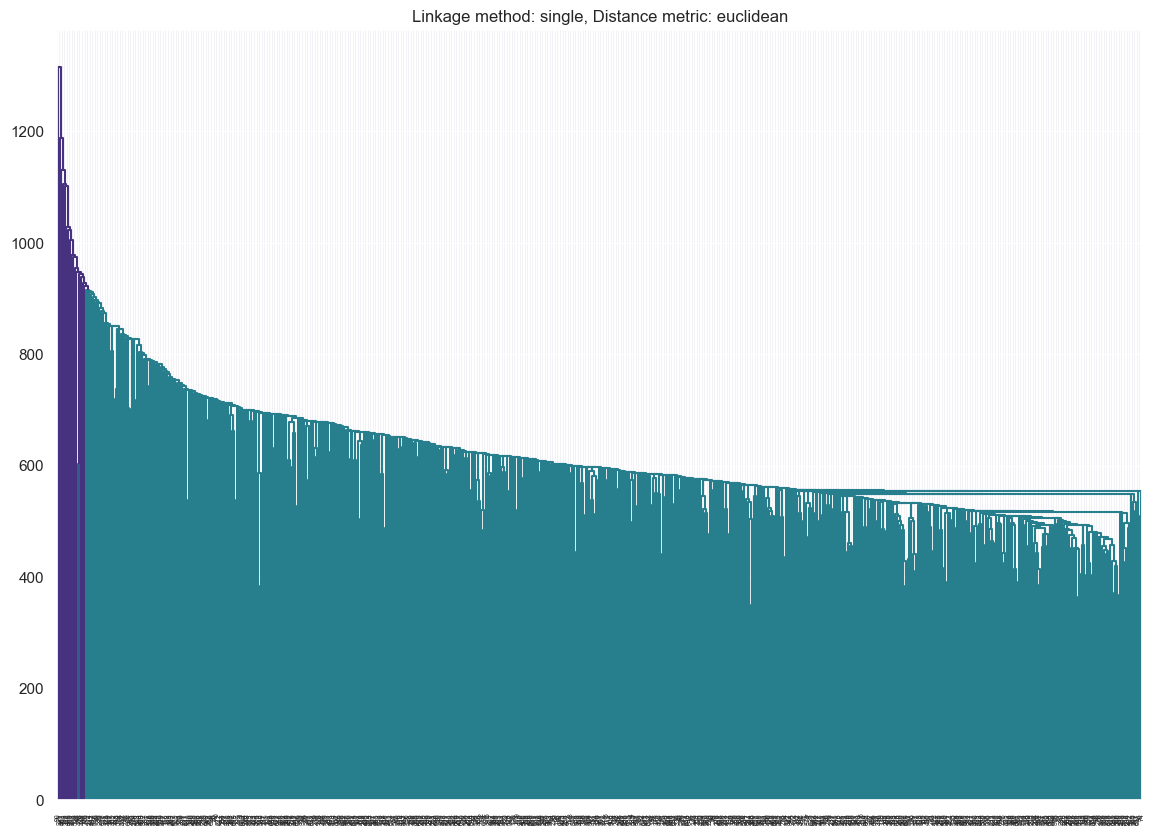

Linkage method: single, Distance metric: euclidean, Number of clusters: 655


In [43]:
# Calculate the number of clusters for each combination of linkage method and distance metric
for linkage_method in linkage_methods:
    for distance_metric in distance_metrics:
        try:
            num_clusters = get_num_clusters(input_data, linkage_method, distance_metric)
            print(f'Linkage method: {linkage_method}, Distance metric: {distance_metric}, Number of clusters: {num_clusters}')
        except ValueError:
            pass
        except:
            pass

##### Conclusion :  Num of cluster required is appearing as 655 for different set of combination for linkage method and distance metric, this indicate that data is distributed very randomely and clustering will not yield good accuracy in prediction.

#### Q3 Cluster the given data using spectral clustering. Are the obtained clusters better than the ones obtined from K-means or hierarchical clustering?

In [48]:
#clusters=3, neighbors=10, random_state=42, affinity='nearest_neighbors'
evaluation_spectral_cluster(input_data, dataset)

Spectral Clustering:
Accuracy Score: 0.3171
Silhouette score: 0.1392
Adjusted Rand score: 0.0043
Rand score: 0.5524


### Performance Analyzer :

#### K-Means Clustering :<br>

| #          | Accuracy Score |  Silhouette Score  |  Adjusted Rand Score  |  Rand Score  |
| :--------: | :-------------:|  :-----------:     |  :---------------:    | :----------: |
| K-Means    | 0.3750         |0.0030              | 0.1376                |  0.5573      |


#### Hierarchical Clustering using fcluster :<br>

| #          | Accuracy Score |  Silhouette Score  |  Adjusted Rand Score  |Rand Score  |
| :--------: | :-------------:|  :-----------:     |  :---------------:    |:----------: |
| Linkage method: average, Distance metric: cosine    |0.1784         |-0.0117            | 0.0080    | 0.5045 |
| Linkage method: average, Distance metric: euclidean |0.3399         |0.2629             | 0.0003    | 0.3438 |
| Linkage method: complete, Distance metric: cosine   |0.2348         |0.0823             | 0.0018    | 0.5425 |
| Linkage method: complete, Distance metric: euclidean|0.1326         |0.1230             | 0.0067    | 0.5156 |
| Linkage method: ward, Distance metric: euclidean    |0.2470         |0.1156             | 0.0027    | 0.5542 |
| Linkage method: single, Distance metric: cosine     |0.3430         |-0.2514            | 0.0000    | 0.3345 |
| Linkage method: single, Distance metric: euclidean  |0.3399         |0.2887             | 0.0000    | 0.3345 |


#### Hierarchical Clustering using Agglomerative Clustering :<br>

| #          | Accuracy Score |  Silhouette Score  |  Adjusted Rand Score  |Rand Score  |
| :--------: | :-------------:|  :-----------:     |  :---------------:    |:----------: |
| Linkage method: average, Distance metric: cosine    |0.0076         |0.0089            | 0.0006    | 0.6676 |
| Linkage method: average, Distance metric: euclidean |0.0030         |----              |-----     |----- |
| Linkage method: complete, Distance metric: cosine   |0.0076         |0.0102            | 0.0005    | 0.6676 |
| Linkage method: complete, Distance metric: euclidean|0.0030         |----              |----      |---- |
| Linkage method: ward, Distance metric: euclidean    |0.0015         |----             |----    |---- |
| Linkage method: single, Distance metric: cosine     |0.0183         |-0.0374            | 0.0022    | 0.6653 |
| Linkage method: single, Distance metric: euclidean  |0.0015         |----             |----    |---- |


#### Spectral Clustering :<br>

| #          | Accuracy Score |  Silhouette Score  |  Adjusted Rand Score  |  Rand Score  |
| :--------: | :-------------:|  :-----------:     |  :---------------:    | :----------: |
| Spectral Clustering | 0.3171         |0.1392              | 0.0043       | 0.5524       |


### Conclusion: 
##### 1. Looking at  the accuracy score we can observe that K-Means clustering is performing comparitively better than spectral and hierarchical clustering. But overall the accuracy score is not good enough.
##### 2. Silhouette, Rand Score & Adjusted Rand score also indicate the same conclusion.

#### Q4 Visualize the clusters using the UMAP or tSNE algorithm.

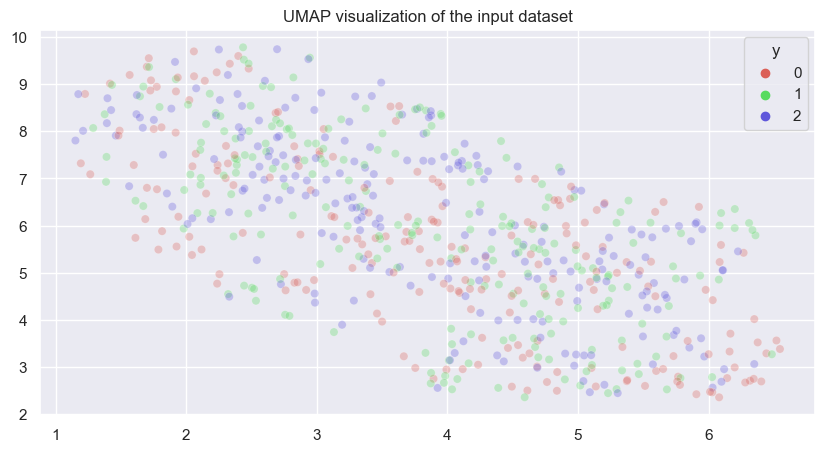

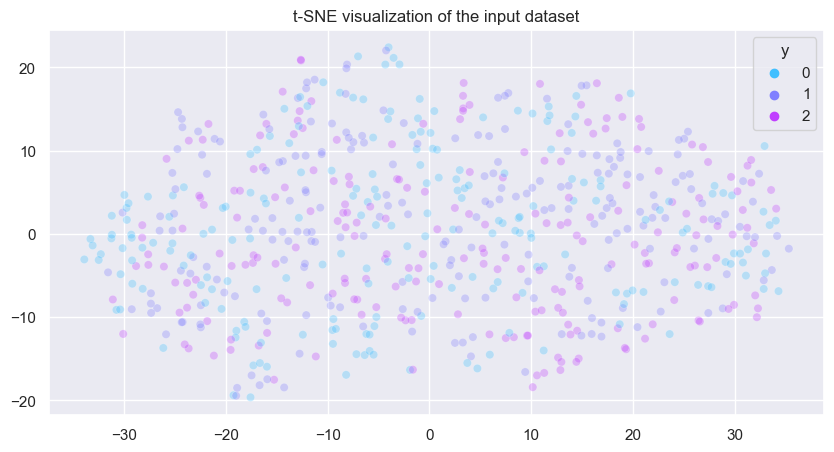

In [20]:
umap_embeddings = umap.UMAP(n_neighbors=10, min_dist=0.3, n_components=3).fit_transform(input_data)
tsne_embeddings = TSNE(n_components=2, perplexity=30).fit_transform(input_data)

#Create a scatter plot for the UMAP embeddings
plotGraph(umap_embeddings,output_data, "UMAP visualization of the input dataset", "hls")

# Create a scatter plot for the t-SNE embeddings
plotGraph(tsne_embeddings,output_data, "t-SNE visualization of the input dataset", "cool")


### Conclusion:
#### Looking at the plot it is very clear that the data distribution for different class of target is very random and clustering will not yield satisfactory cluster which will have higher accuracy. Similar indication we have received when we have done our analysis on this data using different clustering technique like K-Means, hierarchical & spectral clustering.